In [1]:
%load_ext autoreload
%autoreload 2

import hydra
import matplotlib.pyplot as plt
import numpy as np
import xarray
plt.style.use("bmh")


In [7]:
results = xarray.open_zarr("results.zarr", chunks="auto")
phase_speed = results.lam * 1000 / (results.tau * 60)
results = results.assign_coords(r=xarray.ufuncs.hypot(results.px, results.py))
results = results.assign_coords(r_norm=results.r / results.lam)
results = results.assign(
    period_error=results.period-results.tau,
    wavelength_error=results.wavelength-results.lam,
    speed_error=results.phase_speed-phase_speed,
)
results

<xarray.Dataset> Size: 2GB
Dimensions:           (lam: 7, px: 15, py: 15, tau: 5, time: 121, snr: 28)
Coordinates:
  * lam               (lam) int64 56B 150 200 250 300 350 400 450
  * px                (px) int64 120B -1180 -1020 -860 -700 ... 580 740 900 1060
  * tau               (tau) int64 40B 10 20 30 40 50
  * snr               (snr) int64 224B 12 11 10 9 8 7 ... -11 -12 -13 -14 -15
  * time              (time) datetime64[ns] 968B 2025-01-01 ... 2025-01-01T02...
  * py                (py) int64 120B -1180 -1020 -860 -700 ... 580 740 900 1060
    r                 (px, py) float64 2kB 1.669e+03 1.56e+03 ... 1.499e+03
    r_norm            (px, py, lam) float64 13kB 11.13 8.344 ... 3.748 3.331
Data variables:
    vy                (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    period            (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    wavelength        (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    phase_speed       (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    coherence         (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    R                 (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    vx                (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    period_error      (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    wavelength_error  (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>
    speed_error       (px, py, lam, tau, time, snr) float64 213MB dask.array<chunksize=(15, 15, 1, 1, 121, 1), meta=np.ndarray>

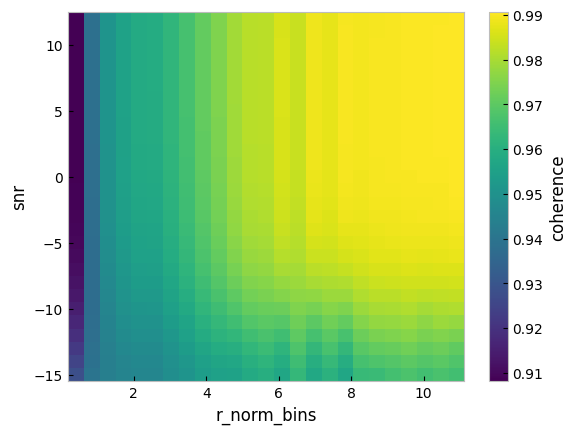

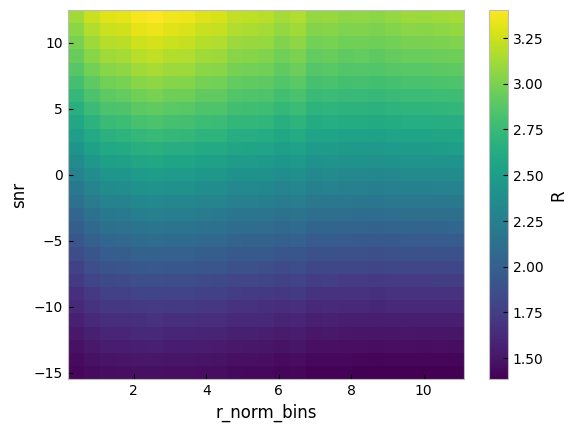

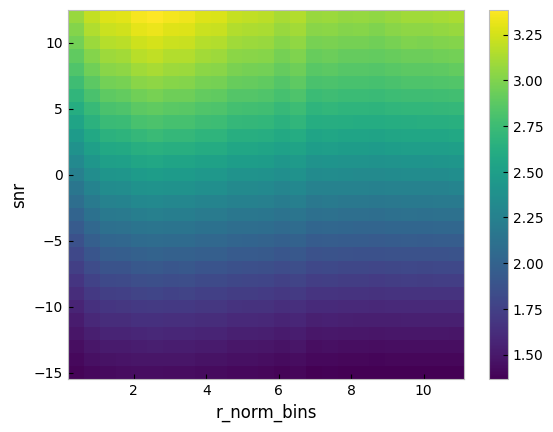

In [47]:
plt.figure()
results.coherence.median(["time", "tau"]).groupby_bins("r_norm", bins=25).mean().plot()
plt.figure()
xarray.ufuncs.log10(results.R).median(["time", "tau"]).groupby_bins("r_norm", bins=25).mean().plot()
plt.figure()
xarray.ufuncs.log10(results.R * results.coherence).median(["time", "tau"]).groupby_bins("r_norm", bins=25).mean().plot()

Text(0.5, 1.0, 'period error')

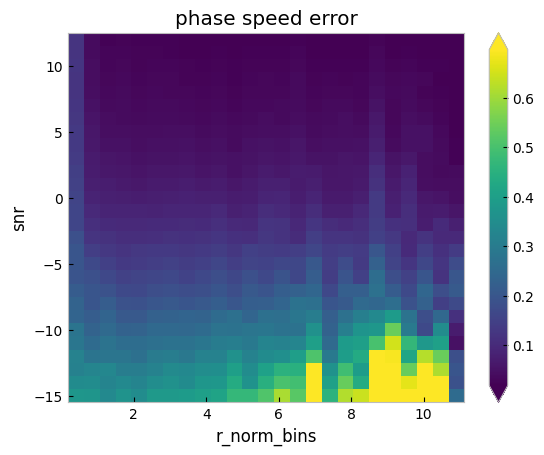

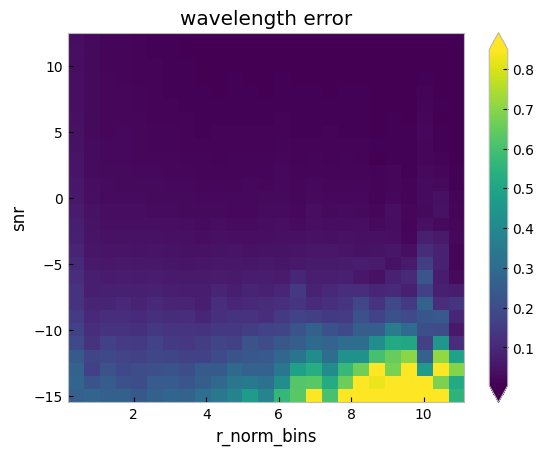

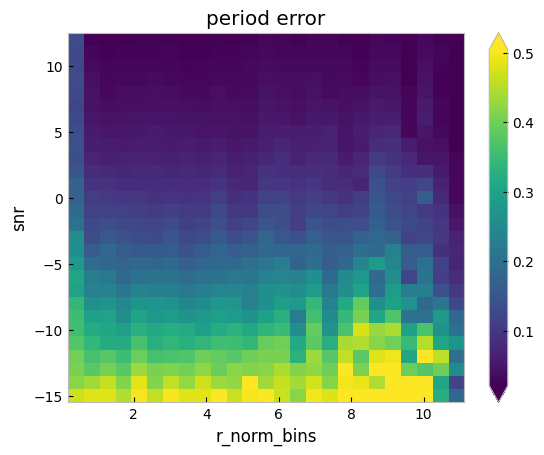

In [42]:
plt.figure()
abs(results.speed_error / phase_speed).median(["time", "tau"]).groupby_bins("r_norm", bins=25).median().plot(robust=True)
plt.title("phase speed error")
plt.figure()
abs(results.wavelength_error / results.lam).median(["time", "tau"]).groupby_bins("r_norm", bins=25).median().plot(robust=True)
plt.title("wavelength error")
plt.figure()
abs(results.period_error / results.tau).median(["time", "tau"]).groupby_bins("r_norm", bins=25).median().plot(robust=True)
plt.title("period error")

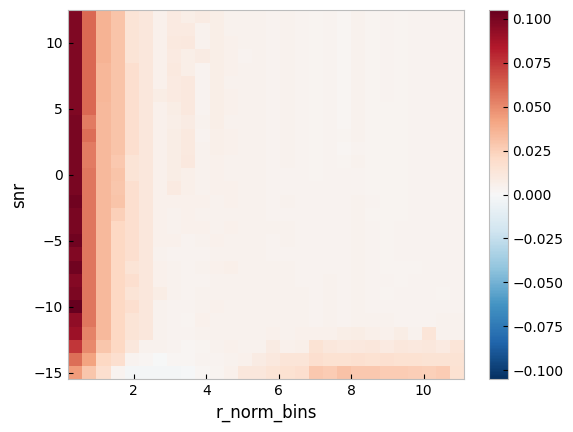

In [9]:
# results.ps_error.median("time").groupby_bins("r_norm", bins=30).median()
# results.ps_error.isel(wavelength=0).median(["time", "phase_speed"]).groupby_bins("r_norm", bins=30).median()
(results.wl_error / results.wavelength).median(["time", "tau"]).groupby_bins("r_norm", bins=28).median().plot()

In [22]:
results.wl_error

<xarray.DataArray 'wl_error' (snr: 28, wavelength: 7, tau: 5, time: 57, p: 225)> Size: 50MB
dask.array<open_dataset-wl_error, shape=(28, 7, 5, 57, 225), dtype=float32, chunksize=(1, 1, 1, 57, 225), chunktype=numpy.ndarray>
Coordinates:
  * tau         (tau) int64 40B 10 20 30 40 50
  * wavelength  (wavelength) int64 56B 150 200 250 300 350 400 450
  * snr         (snr) int64 224B 12 11 10 9 8 7 6 ... -9 -10 -11 -12 -13 -14 -15
  * time        (time) datetime64[ns] 456B 2025-01-01T00:32:00 ... 2025-01-01...
  * p           (p) int64 2kB 0 1 2 3 4 5 6 7 ... 218 219 220 221 222 223 224
    r           (p) float64 2kB dask.array<chunksize=(225,), meta=np.ndarray>
    r_norm      (p, wavelength) float64 13kB dask.array<chunksize=(225, 7), meta=np.ndarray>

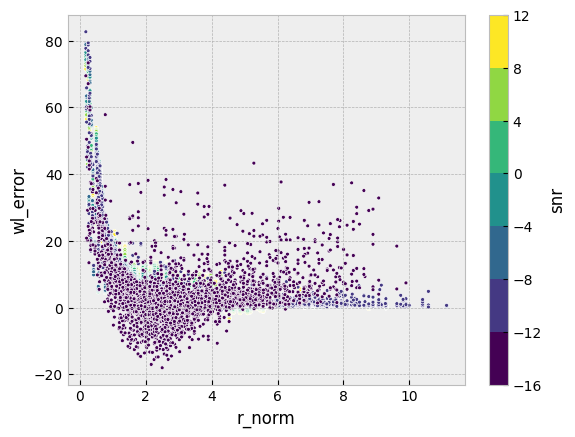

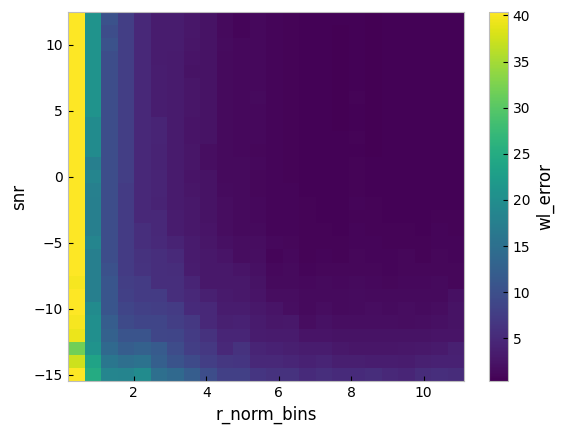

In [ ]:
plt.figure()
results.wl_error.mean(["time", "tau"]).plot.scatter(x="r_norm", hue="snr", s=8, vmin=-16, vmax=12, levels=8)
plt.figure()
abs(results.wl_error).median(["time", "tau"]).groupby_bins("r_norm", bins=24).median().plot()

plt.figure()
results.wl_error.mean(["time", "tau"]).plot.scatter(x="r_norm", hue="snr", s=8, vmin=-16, vmax=12, levels=8)
plt.figure()
abs(results.wl_error).median(["time", "tau"]).groupby_bins("r_norm", bins=24).median().plot()

/homes/starrgw1/code/gnss-tid/.venv/lib/python3.11/site-packages/xarray/core/computation.py:824: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/starrgw1/code/gnss-tid/.venv/lib/python3.11/site-packages/xarray/core/computation.py:824: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/starrgw1/code/gnss-tid/.venv/lib/python3.11/site-packages/xarray/core/computation.py:824: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/starrgw1/code/gnss-tid/.venv/lib/python3.11/site-packages/xarray/core/computation.py:824: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/starrgw1/code/gnss-tid/.venv/lib/python3.11/site-packages/xarray/core/computation.py:824: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/homes/starrgw1/code/gnss-tid/.venv/lib/python3.11/site-packages/xarray/core/computat

Text(0.5, 1.0, 'wavelength error')

<Figure size 640x480 with 0 Axes>

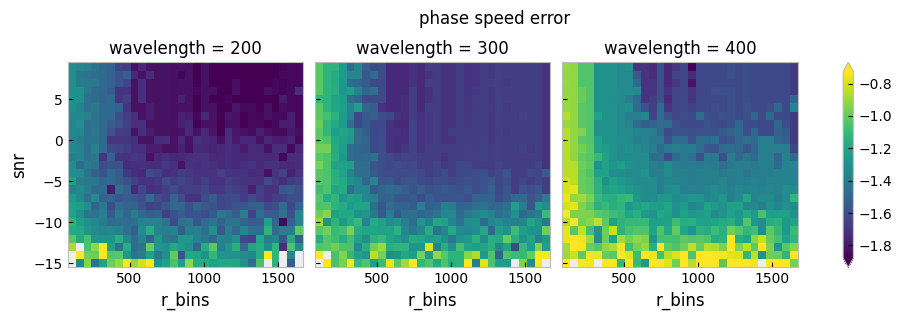

<Figure size 640x480 with 0 Axes>

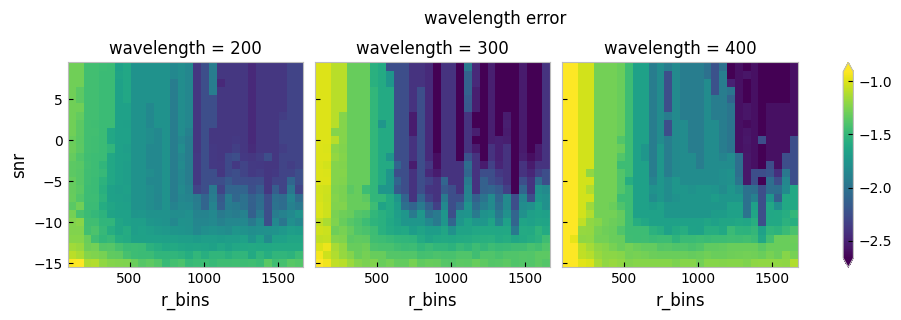

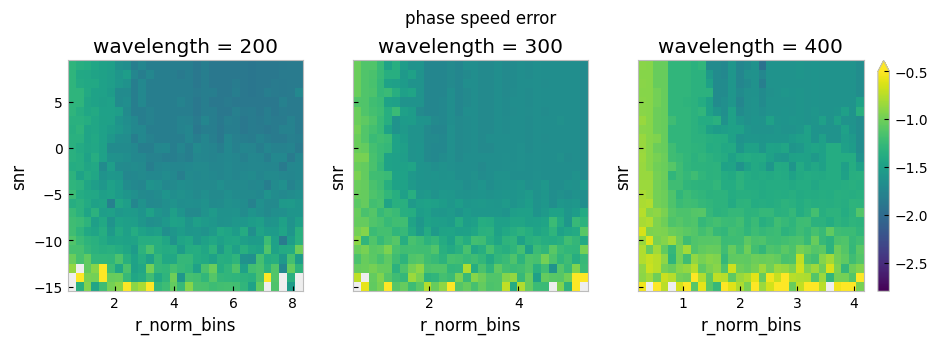

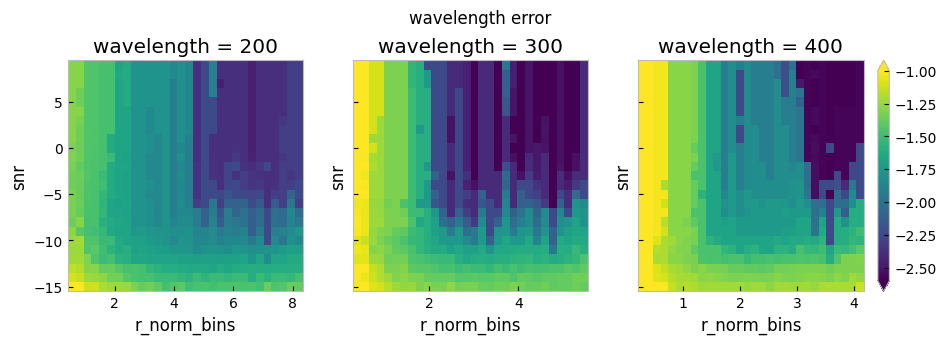

<Figure size 640x480 with 0 Axes>

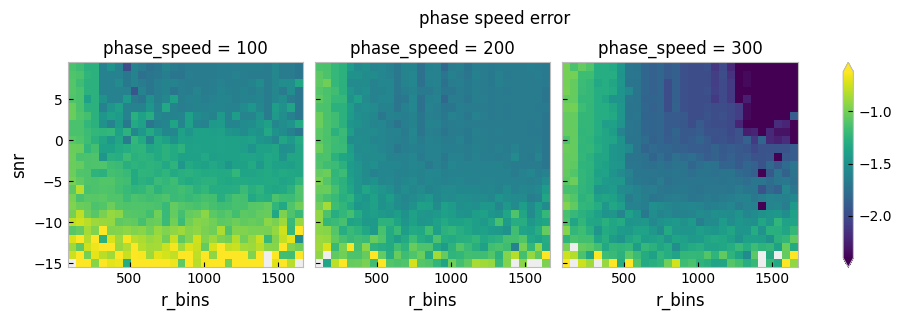

<Figure size 640x480 with 0 Axes>

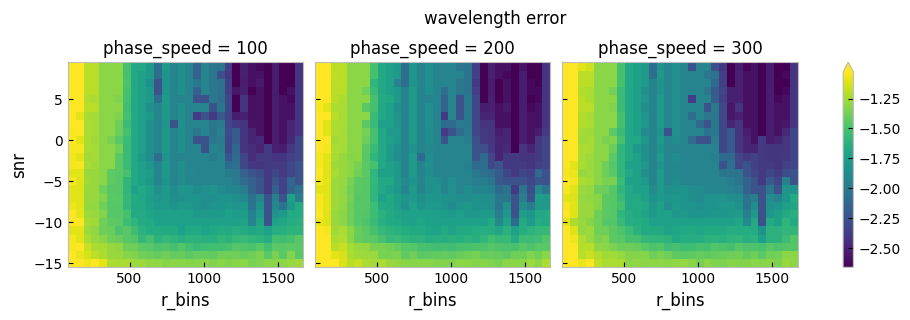

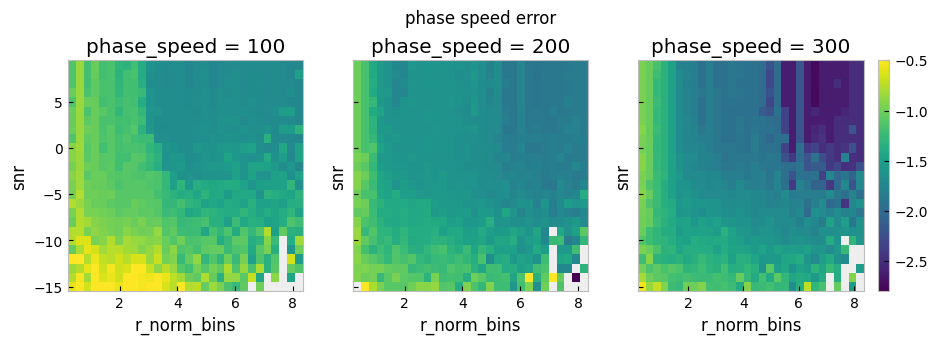

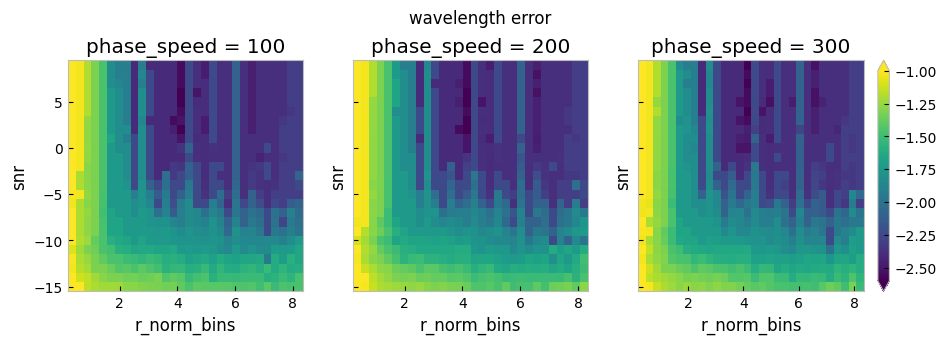

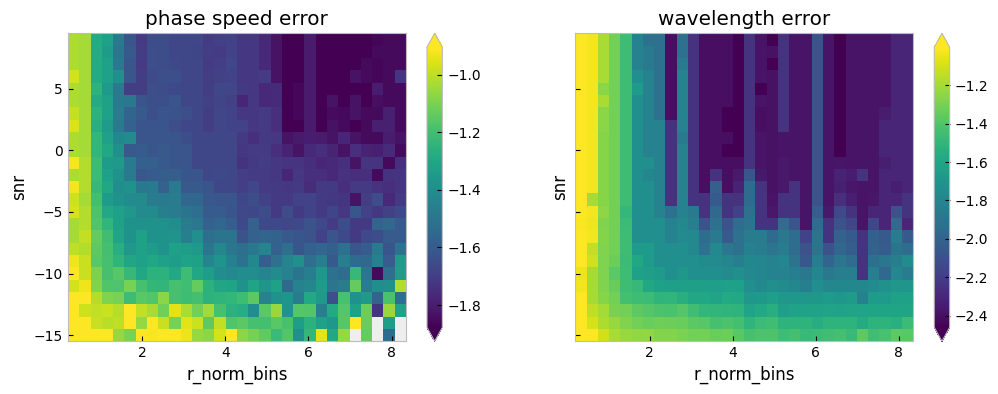

In [ ]:
## WAVELENGTH
plt.figure()
g = np.log10(abs(results.ps_error / results.phase_speed)).median(["time", "phase_speed"]).groupby_bins("r", bins=30).median().plot(robust=True, center=False, col="wavelength")
plt.suptitle("phase speed error", y=1.05)
plt.figure()
np.log10(abs(results.wl_error / results.wavelength)).median(["time", "phase_speed"]).groupby_bins("r", bins=30).median().plot(robust=True, center=False, col="wavelength")
plt.suptitle("wavelength error", y=1.05)

fig1, ax1 = plt.subplots(1, 3, sharey=True, figsize=(11, 3), width_ratios=[1, 1, 1.2])
plt.suptitle("phase speed error", y=1.05)
fig2, ax2 = plt.subplots(1, 3, sharey=True, figsize=(11, 3), width_ratios=[1, 1, 1.2])
plt.suptitle("wavelength error", y=1.05)
for ii in range(results.wavelength.shape[0]):
    np.log10(abs(results.ps_error / results.phase_speed)).isel(wavelength=ii).median(["time", "phase_speed"]).groupby_bins("r_norm", bins=30).median().plot(robust=True, center=False, vmax=-.5, vmin=-2.8, ax=ax1[ii], add_colorbar=ii==results.wavelength.shape[0]-1)
    np.log10(abs(results.wl_error / results.wavelength)).isel(wavelength=ii).median(["time", "phase_speed"]).groupby_bins("r_norm", bins=30).median().plot(robust=True, center=False, vmax=-1, vmin=-2.6, ax=ax2[ii], add_colorbar=ii==results.wavelength.shape[0]-1)

## PHASE SPEED
plt.figure()
np.log10(abs(results.ps_error / results.phase_speed)).median(["time", "wavelength"]).groupby_bins("r", bins=30).median().plot(robust=True, center=False, col="phase_speed")
plt.suptitle("phase speed error", y=1.05)
plt.figure()
np.log10(abs(results.wl_error / results.wavelength)).median(["time", "wavelength"]).groupby_bins("r", bins=30).median().plot(robust=True, center=False, col="phase_speed")
plt.suptitle("wavelength error", y=1.05)

fig1, ax1 = plt.subplots(1, 3, sharey=True, figsize=(11, 3), width_ratios=[1, 1, 1.2])
plt.suptitle("phase speed error", y=1.05)
fig2, ax2 = plt.subplots(1, 3, sharey=True, figsize=(11, 3), width_ratios=[1, 1, 1.2])
plt.suptitle("wavelength error", y=1.05)
for ii in range(results.phase_speed.shape[0]):
    np.log10(abs(results.ps_error / results.phase_speed)).isel(phase_speed=ii).median(["time"]).groupby_bins("r_norm", bins=30).median().plot(robust=True, center=False, vmax=-.5, vmin=-2.8, ax=ax1[ii], add_colorbar=ii==results.phase_speed.shape[0]-1)
    np.log10(abs(results.wl_error / results.wavelength)).isel(phase_speed=ii).median(["time"]).groupby_bins("r_norm", bins=30).median().plot(robust=True, center=False, vmax=-1, vmin=-2.6, ax=ax2[ii], add_colorbar=ii==results.phase_speed.shape[0]-1)

## ALL
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
np.log10(abs(results.ps_error / results.phase_speed)).median(["time", "phase_speed"]).groupby_bins("r_norm", bins=30).median().plot(robust=True, center=False, ax=ax[0])
np.log10(abs(results.wl_error / results.wavelength)).median(["time", "phase_speed"]).groupby_bins("r_norm", bins=30).median().plot(robust=True, center=False, ax=ax[1])
ax[0].set_title("phase speed error")
ax[1].set_title("wavelength error")